In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rotation_range=3,
                               width_shift_range= 0.1,
                               height_shift_range =0.1,
                               rescale = 1/255,
                               shear_range=0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               fill_mode = 'nearest')

In [4]:
image_gen.flow_from_directory('data/train')

Found 125 images belonging to 5 classes.


In [11]:
input_shape = (500,500,3)

In [12]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=input_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 249, 249, 32)      0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1984032)           0         
                                                                 
 activation_10 (Activation)  (None, 1984032)           0         
                                                                 
 dropout_5 (Dropout)         (None, 1984032)           0         
                                                                 
 dense_10 (Dense)            (None, 1)                 1984033   
                                                      

In [32]:
training_img_gen = image_gen.flow_from_directory('data/train',target_size=input_shape[:2],class_mode = 'binary')
test_img_gen = image_gen.flow_from_directory('data/test',target_size=input_shape[:2],class_mode = 'binary')

Found 125 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [33]:
training_img_gen.class_indices

{'18-20': 0, '21-30': 1, '31-40': 2, '41-50': 3, '51-60': 4}

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
model.fit(training_img_gen, epochs=20, validation_data=test_img_gen)

Epoch 1/20
4/4 [==============================] - 20s 5s/step - loss: -303.7645 - accuracy: 0.2160 - val_loss: -917.1978 - val_accuracy: 0.2000
Epoch 2/20
4/4 [==============================] - 16s 4s/step - loss: -1449.0710 - accuracy: 0.2000 - val_loss: -2269.4146 - val_accuracy: 0.2000
Epoch 3/20
4/4 [==============================] - 16s 4s/step - loss: -3180.1455 - accuracy: 0.2000 - val_loss: -4224.2588 - val_accuracy: 0.2000
Epoch 4/20
4/4 [==============================] - 17s 4s/step - loss: -5664.6782 - accuracy: 0.2000 - val_loss: -6886.2783 - val_accuracy: 0.2000
Epoch 5/20
4/4 [==============================] - 16s 4s/step - loss: -8775.9736 - accuracy: 0.2000 - val_loss: -10717.8584 - val_accuracy: 0.2000
Epoch 6/20
4/4 [==============================] - 17s 5s/step - loss: -13448.9971 - accuracy: 0.2000 - val_loss: -15434.2129 - val_accuracy: 0.2000
Epoch 7/20
4/4 [==============================] - 17s 4s/step - loss: -19044.2246 - accuracy: 0.2000 - val_loss: -21423.949

In [40]:
model.metrics_names

['loss', 'accuracy']

In [45]:
model.evaluate(training_img_gen)

4/4 [==============================] - 9s 2s/step - loss: -272681.7500 - accuracy: 0.2000


[-272681.75, 0.20000000298023224]

In [48]:
from sklearn.metrics import classification_report

predictions = np.argmax(model.predict(test_img_gen), axis=-1)
print(classification_report(test_img_gen.classes, predictions))
# print(classification_report(test_img_gen,predictions))

1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

           0       0.20      1.00      0.33         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.20        25
   macro avg       0.04      0.20      0.07        25
weighted avg       0.04      0.20      0.07        25



In [38]:
person_img = 'person.jpg'

In [39]:
from keras.preprocessing import image
person_img = image.load_img(person_img,target_size=(500,500))

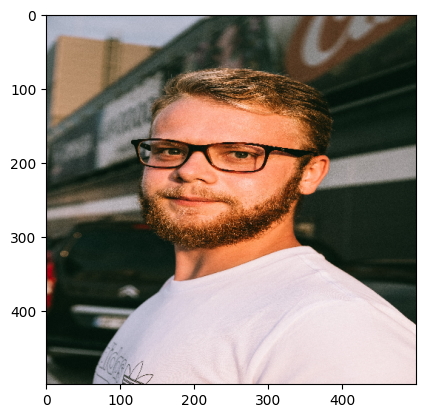

In [49]:
plt.imshow(person_img)

In [52]:
person_img = np.expand_dims(person_img,axis=0)
person_img = person_img/255

In [62]:
model.predict(person_img)
# {'18-20': 0, '21-30': 1, '31-40': 2, '41-50': 3, '51-60': 4}

1/1 [==============================] - 0s 26ms/step


array([[1.]], dtype=float32)

In [66]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_img_gen.classes, predictions))

[[5 0 0 0 0]
 [5 0 0 0 0]
 [5 0 0 0 0]
 [5 0 0 0 0]
 [5 0 0 0 0]]
